<a href="https://colab.research.google.com/github/satoshibasaki/competition/blob/main/signate_46th_beginner_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【第46回_Beginner限定コンペ】携帯電話の機能データからの価格帯分類


携帯電話の機能から販売価格を分類しよう！

## データの読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

dir = "/content/drive/MyDrive/Data/signate_46th_begginer"
df_train_all = pd.read_csv(dir + '/train.csv')
df_test = pd.read_csv(dir + '/test.csv')
df_test_id = df_test["id"]
sample_submission = pd.read_csv(dir + '/sample_submission.csv')

In [ ]:
# display(df_train_all)
# display(df_test)

In [ ]:
# sample_submission

テストデータセットとサンプルファイルのデータ数が合わない。

id=1 がサンプルには無いのが原因。

## データ分析

In [ ]:
display(df_train_all.head())
display(df_test.head())

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,...,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,...,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,...,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,...,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,...,364,1917,1970,16,7,6,1,1,1,0


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1203,0,0.498993,1,0,1,40,0.914530,190,...,7,381,721,1970,6,1,2,1,0,1
1,2,1154,0,1.981014,0,1,0,33,0.025999,82,...,10,376,1555,1970,11,7,3,1,0,0
2,6,1027,1,1.647026,0,0,1,32,0.912318,103,...,1,364,1374,1970,17,1,6,1,0,0
3,10,833,0,1.070061,0,0,0,2,0.033010,156,...,0,1331,1710,832,12,8,8,1,1,0
4,12,1027,1,1.859165,0,4,1,2,0.612349,171,...,13,667,1642,2655,14,5,2,1,1,0


In [ ]:
# id は不要なので落とす
df_train_all = df_train_all.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

In [ ]:
display(df_train_all.head())
display(df_test.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1203,0,0.680981,1,1,1,23,0.402580,117,3,...,1331,721,1970,15,1,4,1,0,1,2
1,1203,1,2.602754,1,0,0,8,0.415612,194,1,...,1571,1262,1150,14,16,14,1,0,1,3
2,1980,1,2.604065,1,0,0,6,0.858110,122,2,...,364,721,1970,18,12,11,1,0,1,1
3,1185,1,2.669403,1,3,0,33,0.027065,132,8,...,447,1162,1950,15,3,19,1,0,0,2
4,1203,1,2.375453,0,4,1,12,0.141485,135,6,...,364,1917,1970,16,7,6,1,1,1,0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1203,0,0.498993,1,0,1,40,0.914530,190,8,7,381,721,1970,6,1,2,1,0,1
1,1154,0,1.981014,0,1,0,33,0.025999,82,6,10,376,1555,1970,11,7,3,1,0,0
2,1027,1,1.647026,0,0,1,32,0.912318,103,6,1,364,1374,1970,17,1,6,1,0,0
3,833,0,1.070061,0,0,0,2,0.033010,156,7,0,1331,1710,832,12,8,8,1,1,0
4,1027,1,1.859165,0,4,1,2,0.612349,171,1,13,667,1642,2655,14,5,2,1,1,0


In [ ]:
# データのシェイプ
print('train data:', df_train_all.shape, 'test data:', df_test.shape)

train data: (1200, 21) test data: (800, 20)


In [ ]:
# データタイプの表示
print('train data:')
print(df_train_all.info(), '\n')
print('test data:')
print(df_test.info(), '\n')

train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1200 non-null   int64  
 1   blue           1200 non-null   int64  
 2   clock_speed    1200 non-null   float64
 3   dual_sim       1200 non-null   int64  
 4   fc             1200 non-null   int64  
 5   four_g         1200 non-null   int64  
 6   int_memory     1200 non-null   int64  
 7   m_dep          1200 non-null   float64
 8   mobile_wt      1200 non-null   int64  
 9   n_cores        1200 non-null   int64  
 10  pc             1200 non-null   int64  
 11  px_height      1200 non-null   int64  
 12  px_width       1200 non-null   int64  
 13  ram            1200 non-null   int64  
 14  sc_h           1200 non-null   int64  
 15  sc_w           1200 non-null   int64  
 16  talk_time      1200 non-null   int64  
 17  three_g        1200 non-null   int64  
 

訓練・テストデータセットすべてのデータポイントに欠損値がない

In [ ]:
# データの詳細情報
print('train data:')
print(df_train_all.describe(), '\n')
print('test data:')
print(df_test.describe(), '\n')

train data:
       battery_power         blue  clock_speed     dual_sim           fc  \
count    1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     1208.958333     0.408333     1.231201     0.565833     1.452500   
std       421.707099     0.491730     0.786728     0.495854     2.590045   
min       518.000000     0.000000     0.466459     0.000000     0.000000   
25%       916.000000     0.000000     0.498935     0.000000     0.000000   
50%      1203.000000     0.000000     1.086733     1.000000     0.000000   
75%      1537.000000     1.000000     1.864943     1.000000     2.000000   
max      1991.000000     1.000000     2.730560     1.000000    16.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000  ...   
mean      0.625833    29.747500     0.374023   137.475833     3.815000  ...   
std       0.484109    17.514071     0.322579    34.706169     2.45

スケールがまちまちだから、標準化が必要

In [ ]:
df_train_all['price_range'].value_counts()

price_range
2    420
1    300
3    268
0    212
Name: count, dtype: int64

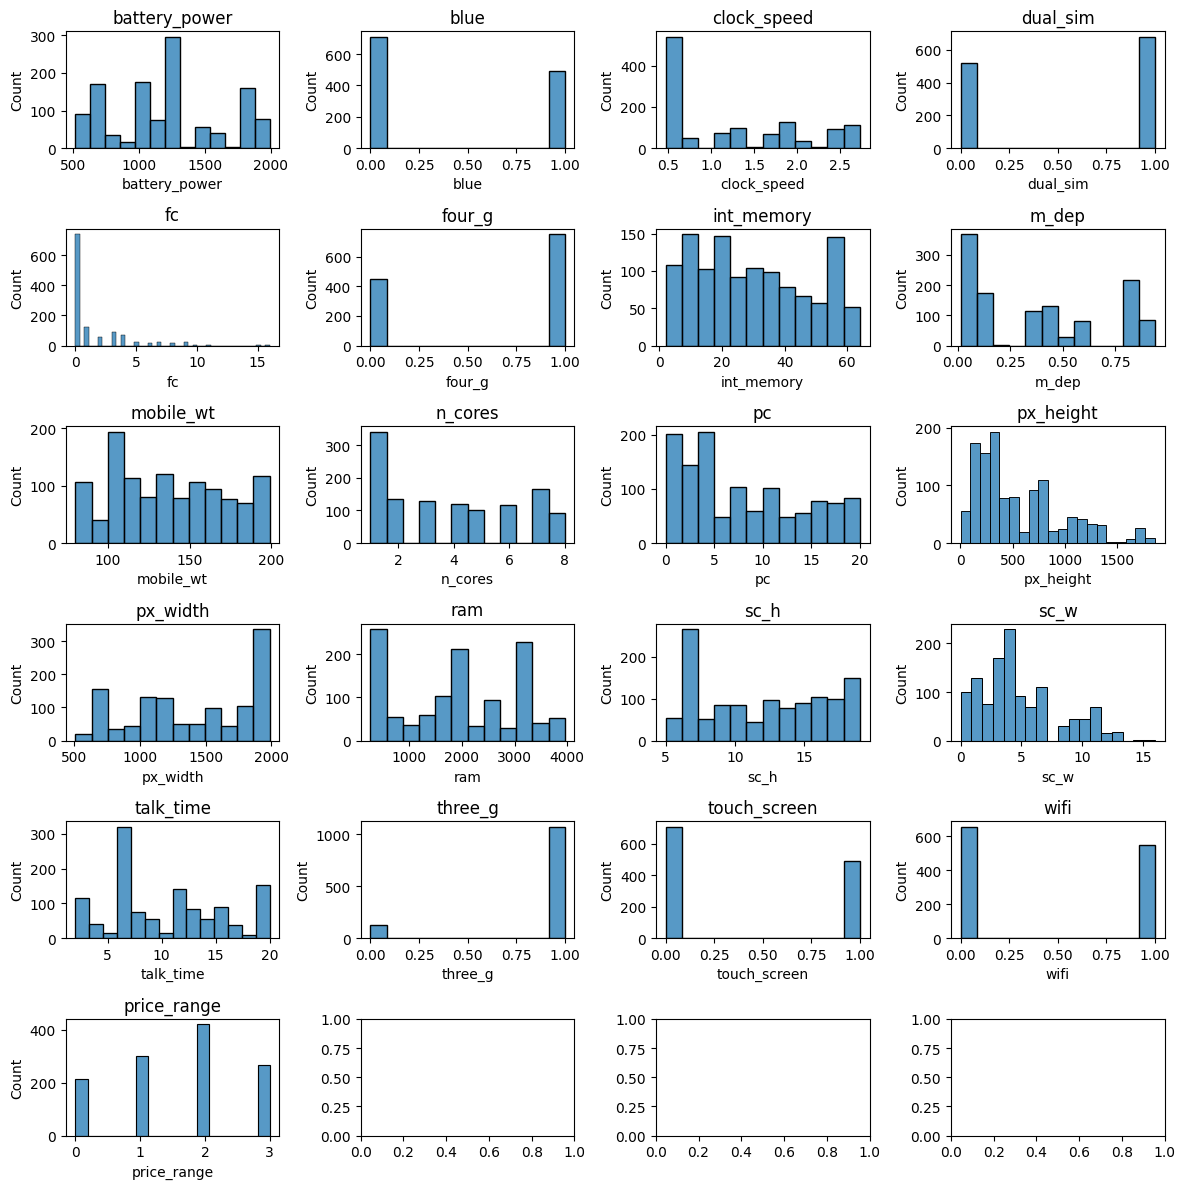

In [ ]:
# 特徴量ごとのヒストグラムを表示

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  if i < len(df_train_all.columns):
    sns.histplot(data=df_train_all, x=df_train_all.columns[i], ax=ax)
    ax.set_title(df_train_all.columns[i])
plt.tight_layout()
plt.show()


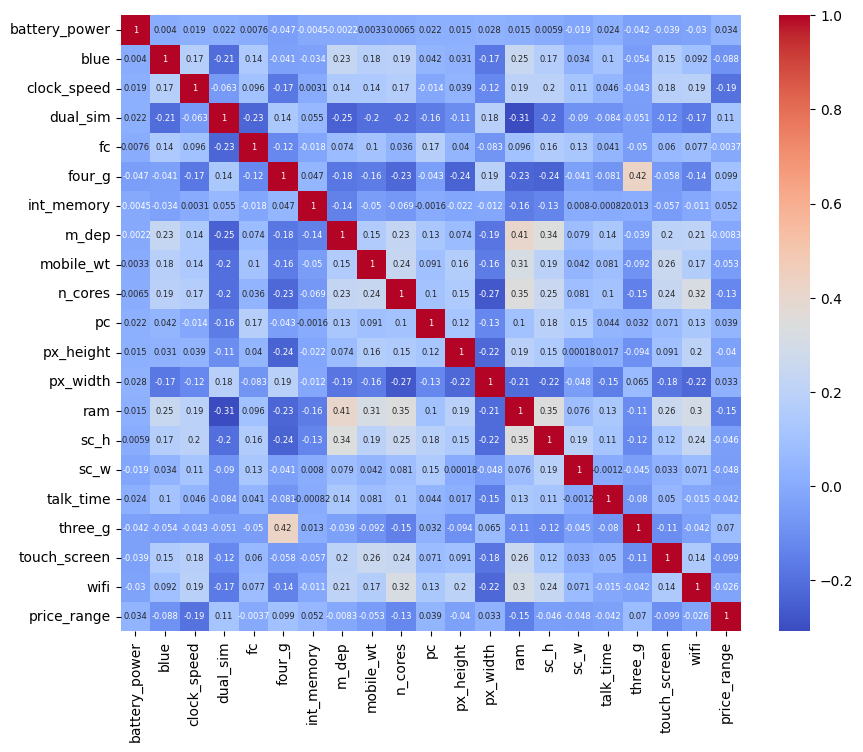

In [ ]:
# 特徴量同士の相関かんけいを表示

corr = df_train_all.corr()
plt.figure(figsize=(10, 8))  # サイズを大きく設定
sns.heatmap(corr, annot=True, annot_kws={"size":6}, cmap='coolwarm')
plt.show()

## 新しい特徴量の作成・追加

In [ ]:
# ターゲット変数 y は分けておく
y = df_train_all["price_range"]
X = df_train_all.drop("price_range", axis=1)  # ここから特徴量は X, df_test に対して作成・追加する

In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
# スクリーン面積: sc_area
X["sc_area"] = np.multiply(X["sc_h"], X["sc_w"])
df_test["sc_area"] = np.multiply(df_test["sc_h"], df_test["sc_w"])

# ピクセル密度: px_density => 値が大きすぎ (inf)
# X["px_density"] = np.divide(np.multiply(X["px_height"], X["px_width"]), X["sc_area"])
# df_test["px_density"] = np.divide(np.multiply(df_test["px_height"], df_test["px_width"]), df_test["sc_area"])

# プロセッサ速度指数: ps_idx
X["ps_idx"] = np.multiply(X["clock_speed"], X["n_cores"])
df_test["ps_idx"] = np.multiply(df_test["clock_speed"], df_test["n_cores"])

# コア当たりのRAM: ram_per_core
X["ram_per_core"] = np.divide(X["ram"], X["n_cores"])
df_test["ram_per_core"] = np.divide(df_test["ram"], df_test["n_cores"])

# メモリ効率: mem_eff
X["mem_eff"] = np.divide(X["ram"], X["mobile_wt"])
df_test["mem_eff"] = np.divide(df_test["ram"], df_test["mobile_wt"])

# ストレージ効率: str_eff
X["str_eff"] = np.divide(X["int_memory"], X["mobile_wt"])
df_test["str_eff"] = np.divide(df_test["int_memory"], df_test["mobile_wt"])

# バッテリー密度: bp_wt
X["bp_wt"] = np.divide(X["battery_power"], X["mobile_wt"])
df_test["bp_wt"] = np.divide(df_test["battery_power"], df_test["mobile_wt"])

# カメラ品質指数: cq_idx
X["cq_idx"] = X["pc"] + X["fc"]
df_test["cq_idx"] = df_test["pc"] + df_test["fc"]

# 通信機能数: conn_ft_cnt
X["conn_ft_cnt"] = X["blue"] + X["four_g"] + X["three_g"] + X["wifi"]
df_test["conn_ft_cnt"] = df_test["blue"] + df_test["four_g"] + df_test["three_g"] + df_test["wifi"]

# 全体の機能数: all_ft_cnt
X["all_ft_cnt"] = X["blue"] + X["dual_sim"]+ X["touch_screen"] + X["four_g"] + X["three_g"] + X["wifi"]
df_test["all_ft_cnt"] = df_test["blue"]+ df_test["dual_sim"]+ df_test["touch_screen"] + df_test["four_g"] + df_test["three_g"] + df_test["wifi"]

In [ ]:
X.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,cq_idx,conn_ft_cnt,all_ft_cnt,sc_area
0,1203,0,0.680981,1,1,1,23,0.40258,117,3,...,15,1,4,1,0,1,3,3,4,15


### train データセットを訓練・検証データに分割

In [ ]:
print("クラスラベル", y.unique())
print("カラム数：", len(X.columns))

from sklearn.model_selection import train_test_split
# X, y = df_train_all.iloc[:, :20], df_train_all.iloc[:, 20]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

クラスラベル [2 3 1 0]
カラム数： 29


In [ ]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, df_test.shape)

(840, 29) (360, 29) (840,) (360,) (800, 29)


In [ ]:
# Output to check
print('\ntrain: \n', X_train.head(), '\n')
print(X_train.info(), '\n')
print('\nvalid: \n', X_valid.head(), '\n')
print(X_valid.info(), '\n')
print('\ntest: \n', df_test.head(), '\n')
print(df_test.info(), '\n')


train: 
       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1068           1843     0     0.498767         1   0       1          20   
102            1027     1     1.647431         0   1       0          32   
728            1154     0     1.830549         1   0       0           2   
227            1027     0     0.670485         0   4       1          39   
46             1203     0     0.499148         1   0       0          31   

         m_dep  mobile_wt  n_cores  ...  wifi  sc_area     ps_idx  \
1068  0.033145         85        1  ...     0       28   0.498767   
102   0.864353        164        5  ...     0      119   8.237153   
728   0.798637        121        7  ...     0       57  12.813841   
227   0.082979        121        2  ...     0        8   1.340970   
46    0.402334        124        3  ...     1       42   1.497443   

      ram_per_core    mem_eff   str_eff      bp_wt  cq_idx  conn_ft_cnt  \
1068    286.000000   3.364706  0.235294  21

### 特徴量の尺度を揃える

カテゴリ変数は無いようなので、0/1 以外の特徴量は標準化をする

In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'sc_area', 'ps_idx', 'cq_idx', 'conn_ft_cnt',
       'all_ft_cnt'],
      dtype='object')

In [ ]:
df_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'sc_area', 'ps_idx', 'ram_per_core', 'mem_eff',
       'str_eff', 'bp_wt', 'cq_idx', 'conn_ft_cnt', 'all_ft_cnt'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# std_columns = ['battery_power', 'clock_speed', 'fc',
#        'int_memory', 'm_dep', 'mobile_wt', 'pc',
#        'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# std_columns = ['battery_power', 'clock_speed',
#                 'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
#                 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
#                 'sc_area', 'px_density', 'ram_per_core',
#                 'mem_eff', 'str_eff', 'bp_wt', 'ps_idx', 'cq_idx']

std_columns = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'sc_area',
       'ps_idx', 'ram_per_core', 'mem_eff', 'str_eff', 'bp_wt']

# Standardize training data
sc = StandardScaler().fit(X_train[std_columns])
X_train[std_columns] = sc.transform(X_train[std_columns])

# Standardize validation data
X_valid[std_columns] = sc.transform(X_valid[std_columns])

# Standardize test data
df_test[std_columns] = sc.transform(df_test[std_columns])

# Output to check
print(X_train.head(), '\n')
print(X_valid.head(), '\n')
print(df_test.head(), '\n')

      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
1068       1.526217     0    -0.928677         1 -0.572332       1   
102       -0.415033     1     0.525029         0 -0.188646       0   
728       -0.112903     0     0.756776         1 -0.572332       0   
227       -0.415033     0    -0.711357         0  0.962412       1   
46         0.003668     0    -0.928194         1 -0.572332       0   

      int_memory     m_dep  mobile_wt  n_cores  ...  wifi   sc_area    ps_idx  \
1068   -0.545844 -1.066855  -1.538325        1  ...     0 -0.594673 -0.906724   
102     0.142522  1.516574   0.737728        5  ...     0  1.140386  0.622530   
728    -1.578393  1.312328  -0.501136        7  ...     0 -0.041742  1.526973   
227     0.544069 -0.911969  -0.501136        2  ...     0 -0.976005 -0.740289   
46      0.085158  0.080601  -0.414704        3  ...     1 -0.327741 -0.709366   

      ram_per_core   mem_eff   str_eff     bp_wt  cq_idx  conn_ft_cnt  \
1068     -0.576297 

In [ ]:
# 確認用コード
print('\ntrain: \n', X_train[std_columns].mean(axis=0))
print(X_train[std_columns].std(axis=0))

print('\nvalid: \n', X_valid[std_columns].mean(axis=0))
print(X_valid[std_columns].std(axis=0))

print('\ntest: \n', df_test[std_columns].mean(axis=0))
print(df_test[std_columns].std(axis=0))


train: 
 battery_power    1.797504e-16
clock_speed     -1.691768e-17
fc              -6.555603e-17
int_memory       7.612958e-17
m_dep           -2.453064e-16
mobile_wt       -2.157005e-16
pc               8.247371e-17
px_height        1.141944e-16
px_width         6.026925e-17
ram             -4.017950e-17
sc_h            -8.670313e-17
sc_w            -1.226532e-16
talk_time        1.247679e-16
sc_area         -5.921189e-17
ps_idx           8.670313e-17
ram_per_core    -5.286776e-17
mem_eff         -2.072416e-16
str_eff          2.114711e-17
bp_wt           -3.045183e-16
dtype: float64
battery_power    1.000596
clock_speed      1.000596
fc               1.000596
int_memory       1.000596
m_dep            1.000596
mobile_wt        1.000596
pc               1.000596
px_height        1.000596
px_width         1.000596
ram              1.000596
sc_h             1.000596
sc_w             1.000596
talk_time        1.000596
sc_area          1.000596
ps_idx           1.000596
ram_per_core   

In [ ]:
from sklearn.linear_model import LogisticRegression

# L1 正則化ロジスティック回帰のインスタンスを生成：逆正則化パラメータ C=1.0 はデフォルト値であり、
# 値を大きくしたり小さくしたりすると、正則化の効果を強めたり弱めたりできる

# lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')  # lbfgs は L1 正則化付きの損失関数の最適化をサポートしていない
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='ovr')

# 訓練データに適合
lr.fit(X_train, y_train)
# 訓練データに対する正解率の表示
print('Training accuracy:', lr.score(X_train, y_train))

# 訓練データに対する正解率の表示
print('Test accuracy:', lr.score(X_valid, y_valid))

Training accuracy: 0.4630952380952381
Test accuracy: 0.475


In [ ]:
# prompt: calcurate f1macro loss function using valid dataset.

from sklearn.metrics import f1_score

valid_preds = lr.predict(X_valid)
f1_macro = f1_score(y_valid, valid_preds, average='macro')
print('F1 Macro:', f1_macro)


F1 Macro: 0.4101437046493307


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_valid, y_valid))

Training accuracy: 0.6642857142857143
Test accuracy: 0.475


In [ ]:
valid_preds = knn.predict(X_valid)
f1_macro = f1_score(y_valid, valid_preds, average='macro')
print('F1 Macro:', f1_macro)


F1 Macro: 0.44918515047812047


In [ ]:
# ランダムフォレストで特徴量の重要度を評価する
from sklearn.ensemble import RandomForestClassifier

# データセットの特徴量の名称
feat_labels = X_train.columns
# ランダムフォレストインスタンスの生成 ((決定木の個数=500)
forest = RandomForestClassifier(n_estimators=500, random_state=42)
# モデルを適合
forest.fit(X_train, y_train)
# 特徴量の重要度のインデックスを抽出
importances = forest.feature_importances_
#print(importances)

# 重要度の降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]
#print(indices)

# 重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
    print(f"{f + 1:3d}) {feat_labels[indices[f]]} {importances[indices[f]]}")

  1) ram 0.09762182539353907
  2) clock_speed 0.09705990600656658
  3) m_dep 0.08868013185822236
  4) px_width 0.08696915984462888
  5) mobile_wt 0.0712288399065379
  6) sc_h 0.06792848889019122
  7) px_height 0.06683349912997583
  8) int_memory 0.059142615347552906
  9) pc 0.053741443930973076
 10) talk_time 0.05255764738698459
 11) battery_power 0.051032013920002436
 12) n_cores 0.04946273332428755
 13) sc_w 0.047883544146652475
 14) fc 0.028388990253505397
 15) dual_sim 0.016292410743595442
 16) blue 0.015962435078709175
 17) touch_screen 0.014329560083804555
 18) wifi 0.013673986965986316
 19) four_g 0.013210737888362405
 20) three_g 0.008000029899921657


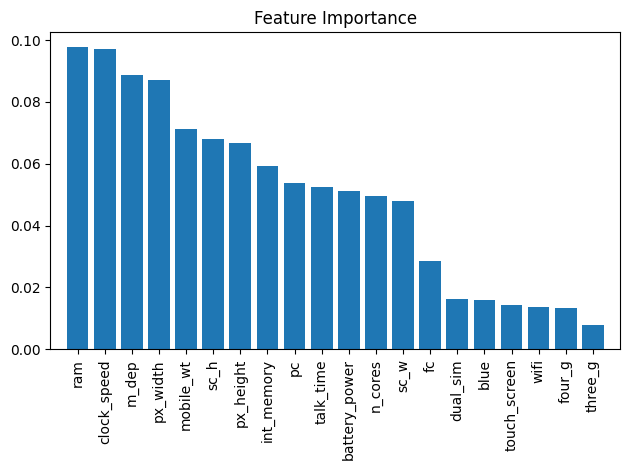

In [ ]:
# グラフで重要度を可視化
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
#plt.bar(range(X_train.shape[1]), importances[indices])
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## モデルの作成とモデルの訓練

In [ ]:
# xgboost を使用

import xgboost as xgb

# 訓練データセットを xgboost 用に変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# パラメータの設定
param = {'max_depth': 2, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 4, 'eval_metric': 'mlogloss'}

eval_list = [(dvalid, 'eval'), (dtrain, 'train')]

# Specify which dataset and which metric should be used for early stopping.
early_stopping_rounds = 10
early_stop = xgb.callback.EarlyStopping(rounds=early_stopping_rounds,
                                        metric_name='mlogloss',
                                        data_name='eval')

bst = xgb.train(param, dtrain, evals=eval_list, num_boost_round=1000, callbacks=[early_stop])


[0]	eval-mlogloss:1.27530	train-mlogloss:1.27760
[1]	eval-mlogloss:1.21320	train-mlogloss:1.21641
[2]	eval-mlogloss:1.17278	train-mlogloss:1.17605
[3]	eval-mlogloss:1.14658	train-mlogloss:1.14440
[4]	eval-mlogloss:1.12578	train-mlogloss:1.12112
[5]	eval-mlogloss:1.11374	train-mlogloss:1.10087
[6]	eval-mlogloss:1.10657	train-mlogloss:1.08150
[7]	eval-mlogloss:1.10047	train-mlogloss:1.06598
[8]	eval-mlogloss:1.09759	train-mlogloss:1.05028
[9]	eval-mlogloss:1.09290	train-mlogloss:1.03576
[10]	eval-mlogloss:1.08949	train-mlogloss:1.02296
[11]	eval-mlogloss:1.08721	train-mlogloss:1.01070
[12]	eval-mlogloss:1.08170	train-mlogloss:1.00034
[13]	eval-mlogloss:1.08338	train-mlogloss:0.98901
[14]	eval-mlogloss:1.08010	train-mlogloss:0.98024
[15]	eval-mlogloss:1.08087	train-mlogloss:0.96937
[16]	eval-mlogloss:1.07994	train-mlogloss:0.95961
[17]	eval-mlogloss:1.07913	train-mlogloss:0.95121
[18]	eval-mlogloss:1.08086	train-mlogloss:0.94418
[19]	eval-mlogloss:1.08059	train-mlogloss:0.93451
[20]	eval-

In [ ]:
# 検証結果の確認
print(f"Best Score:{bst.best_score:.4f}, Iteratin:{bst.best_iteration:d}")

Best Score:1.0791, Iteratin:17


In [ ]:
# 訓練データに対する正解率の表示

from sklearn.metrics import f1_score

# print('Training accuracy:', xgb.score(X_train, y_train))
pred_train = bst.predict(dtrain)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, pred_train)
print(f"Training accuracy: {score:.4f}")

# 検証データに対する正解率の表示

pred_valid = bst.predict(dvalid)
score = accuracy_score(y_valid, pred_valid)
print(f"Valid accuracy: {score:.4f}")


f1_macro = f1_score(y_valid, pred_valid, average='macro')
print(f"F1 Macro: {f1_macro:.4f}")


Training accuracy: 0.7167
Valid accuracy: 0.5139
F1 Macro: 0.4812


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

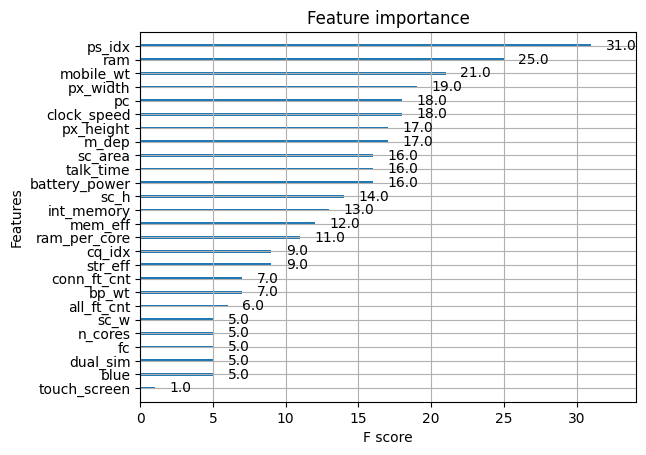

In [ ]:
# 特徴量の重要度の可視化
xgb.plot_importance(bst)

In [ ]:
print(pred_train, '\n')
print(pred_valid, '\n')

[2. 1. 1. 2. 2. 3. 1. 1. 3. 2. 3. 1. 0. 1. 1. 2. 1. 2. 3. 3. 0. 2. 1. 1.
 1. 2. 0. 2. 2. 3. 0. 3. 3. 1. 1. 3. 3. 1. 0. 1. 2. 3. 3. 3. 2. 2. 1. 1.
 2. 1. 3. 1. 1. 1. 2. 2. 1. 1. 3. 3. 0. 2. 3. 3. 3. 1. 1. 0. 1. 1. 2. 0.
 2. 3. 0. 3. 0. 3. 2. 2. 2. 0. 1. 1. 1. 1. 3. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 1. 2. 3. 2. 1. 1. 3. 3. 1. 1. 0. 0. 2. 1. 2. 0. 2. 1. 0. 1. 0. 0. 1. 3.
 1. 0. 1. 2. 1. 2. 3. 0. 1. 0. 1. 0. 1. 3. 1. 3. 2. 1. 3. 2. 0. 2. 0. 2.
 1. 2. 1. 2. 3. 3. 1. 3. 1. 2. 3. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 3. 1. 2.
 3. 2. 3. 1. 2. 1. 0. 2. 1. 2. 2. 1. 2. 3. 3. 3. 2. 0. 3. 2. 1. 1. 1. 3.
 1. 2. 1. 0. 1. 0. 0. 2. 3. 2. 1. 0. 2. 1. 2. 2. 0. 3. 0. 0. 1. 1. 1. 1.
 0. 3. 0. 1. 1. 3. 3. 1. 0. 1. 0. 3. 2. 3. 2. 2. 1. 1. 0. 2. 2. 1. 0. 2.
 2. 3. 1. 2. 3. 3. 3. 3. 3. 1. 3. 2. 3. 2. 0. 3. 1. 1. 3. 2. 1. 2. 3. 1.
 3. 0. 0. 1. 1. 1. 2. 2. 1. 3. 3. 0. 2. 3. 1. 1. 3. 1. 2. 3. 3. 2. 0. 3.
 1. 0. 1. 3. 2. 2. 1. 3. 1. 3. 3. 1. 3. 1. 1. 1. 1. 1. 1. 0. 2. 1. 1. 1.
 1. 1. 1. 3. 3. 1. 2. 1. 2. 2. 0. 2. 1. 0. 1. 3. 2.

## テストデータを用いた推論

In [ ]:
# テストデータを用いた推論
dtest = xgb.DMatrix(df_test)
pred_test = bst.predict(dtest)

pred_test = pred_test.astype(int)  # float => int

In [ ]:
pred_test

array([3, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 2, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       2, 3, 1, 1, 3, 1, 3, 2, 0, 1, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 0, 3, 2, 0, 0, 2, 3, 2, 2,
       2, 2, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 3, 2, 0,
       1, 0, 3, 1, 1, 2, 3, 2, 2, 1, 2, 2, 0, 1, 3, 2, 2, 0, 3, 2, 3, 1,
       2, 3, 2, 1, 1, 3, 3, 1, 3, 1, 0, 3, 3, 1, 1, 1, 2, 2, 3, 1, 1, 3,
       3, 2, 3, 3, 0, 2, 1, 0, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 3, 0, 3, 1, 2, 2, 3, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 3, 3, 3, 2, 1, 1, 2, 3, 1, 0, 3, 1,
       1, 0, 3, 2, 1, 2, 2, 3, 2, 2, 1, 1, 3, 1, 1, 0, 1, 2, 2, 2, 3, 3,
       1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2, 0, 3, 1, 2, 3, 2, 0, 1, 0,
       0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 2, 1, 1, 2, 0, 1, 3, 0, 3, 2, 3, 2,
       1, 0, 2, 3, 1, 2, 1, 2, 2, 3, 3, 1, 0, 1, 2, 1, 1, 2, 1, 3, 2, 1,
       2, 0, 0, 1, 1, 2, 3, 3, 1, 1, 2, 1, 2, 1, 1,

In [ ]:
# test.csv の index(id) に合わせた submission ファイル作成

df_submission = pd.DataFrame({'id': df_test_id, 'price_range': pred_test})
df_submission.to_csv('submission.csv', index=False, header=None)


In [ ]:
display(df_submission)

,id,price_range
0,1,3
1,2,1
2,6,3
3,10,0
4,12,2
...,...,...
795,1978,3
796,1980,1
797,1982,3
798,1988,2


In [ ]:
# sample_submission の index(id) に合わせた submission ファイル作成
# sample_submission.iloc[:, 1] = test_preds[1:]
# print(sample_submission)

# df_submission.to_csv('submission.csv', index=False, header=None)